# Data Analysis Notebook

This notebook provides an exploratory analysis of the real estate sales dataset. Key objectives include examining the distribution of target audiences across different months, uncovering data patterns, and supporting further machine learning work.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('../data/data.xlsx', sheet_name='Данные')

print("Data shape:", df.shape)
print(df.info())

Data shape: (13, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Время               13 non-null     datetime64[ns]
 1   ЦА 1                13 non-null     float64       
 2   ЦА 2                13 non-null     float64       
 3   ЦА 3                13 non-null     float64       
 4   ЦА 4                13 non-null     float64       
 5   Параметр квартир 1  13 non-null     float64       
 6   Параметр квартир 2  13 non-null     float64       
 7   Внешний фактор 1    13 non-null     int64         
 8   Внешний фактор 2    13 non-null     int64         
 9   Внешний фактор 3    13 non-null     int64         
 10  Внешний фактор 4    13 non-null     float64       
 11  Студии              13 non-null     int64         
 12  1 комн              13 non-null     int64         
 13  2 комн              13 non-null

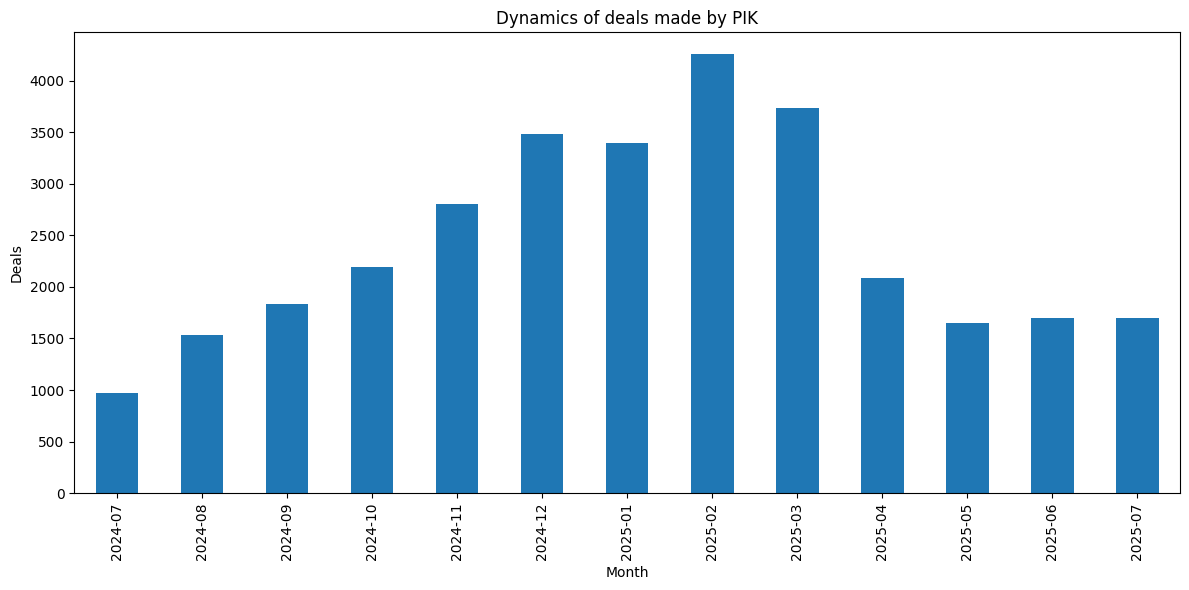

In [16]:
df['Месяц'] = pd.to_datetime(df['Время']).dt.to_period('M')

deals_monthly = df.groupby('Месяц')['Целевые сделки'].sum()

deals_monthly.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Dynamics of deals made by PIK')
plt.xlabel('Month')
plt.ylabel('Deals')
plt.tight_layout()
plt.show()

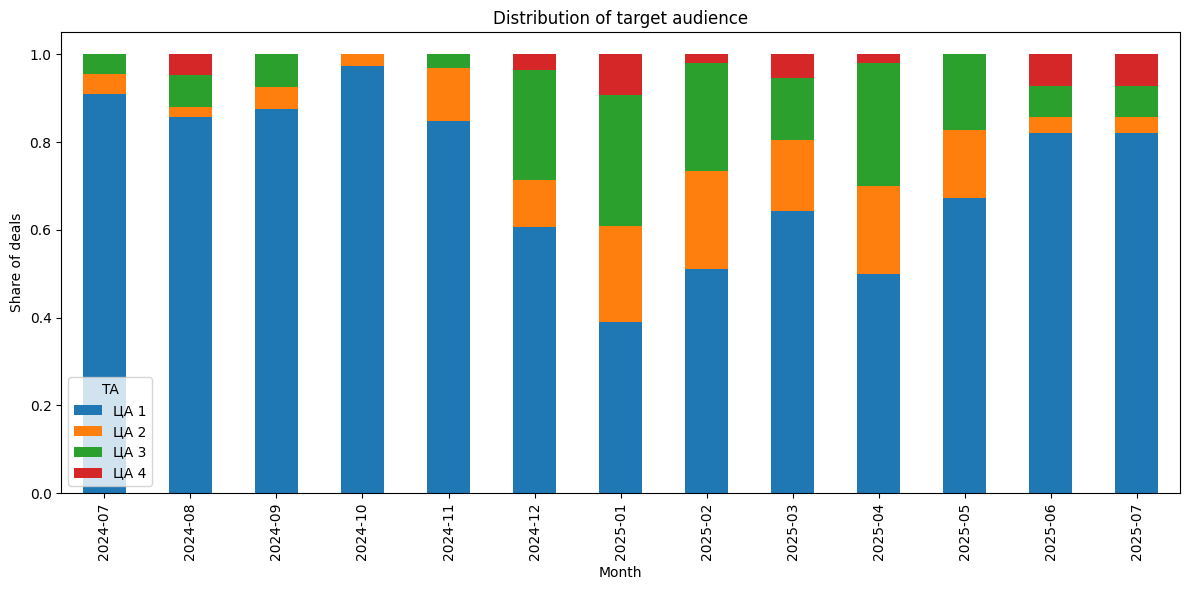

In [17]:
ca_cols = [col for col in df.columns if col.startswith('ЦА ')]

ca_monthly = df.groupby('Месяц')[ca_cols].sum()

ca_monthly.plot(kind='bar', figsize=(12,6), stacked=True)
plt.title('Distribution of target audience')
plt.xlabel('Month')
plt.ylabel('Share of deals')
plt.legend(title='TA')
plt.tight_layout()
plt.show()